In [133]:
import pandas as pd
import regex as re
import numpy as np
import seaborn as sns

df = pd.read_csv('income_evaluation.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [135]:
list = np.array(df.columns)
columns = []
for i in list:
    columns.append(re.sub(r'\s','',i))
df.columns = columns
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [137]:
df = df.apply(lambda x: x.apply(lambda y: re.sub(r'\s+', '', y)) if x.dtype == "object" else x)

In [138]:
df = df.drop(['education','fnlwgt'],axis = 1)
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [139]:
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [140]:
countries = df[['native-country']]
# Mapping of countries to continents
continent_mapping = {
    'North America': ['United-States', 'Cuba', 'Jamaica', 'Mexico', 'Canada', 'Honduras', 'Puerto-Rico', 'Dominican-Republic', 'El-Salvador', 'Guatemala'],
    'Europe': ['England', 'Germany', 'France', 'Italy', 'Poland', 'Portugal', 'Scotland', 'Ireland', 'Hungary', 'Greece', 'Holand-Netherlands', 'Yugoslavia'],
    'Asia': ['India', 'Iran', 'Philippines', 'China', 'Japan', 'Thailand', 'Vietnam', 'Laos', 'Cambodia', 'Taiwan'],
    'South America': ['Columbia', 'Ecuador', 'Peru', 'Nicaragua', 'Trinadad&Tobago'],
    'Caribbean': ['Cuba', 'Jamaica', 'Puerto-Rico'],
    'Unknown': ['?', 'South', 'Outlying-US(Guam-USVI-etc)', 'Hong']
}

# Create a reverse mapping for classification
country_to_continent = {country: continent for continent, countries in continent_mapping.items() for country in countries}

# Classify countries into continents
classified_continents = countries.map(lambda x: country_to_continent.get(x, 'Unknown'))

# Create a DataFrame to display the results
df['continents'] = classified_continents
df


,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,continents
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,North America
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,North America
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,North America
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,North America
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Caribbean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,North America
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,North America
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,North America
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,North America


In [145]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['workclass', 'marital-status','occupation','relationship','race','sex','continents']

encoder = OneHotEncoder(drop='first', sparse_output=False)  # sparse_output=False to get a dense matrix
encoded_data = encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

df_final = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

df_final = df_final.drop('native-country',axis=1)
df_final

,age,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,continents_Caribbean,continents_Europe,continents_North America,continents_South America,continents_Unknown
0,39,13,2174,0,40,<=50K,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,50,13,0,0,13,<=50K,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,38,9,0,0,40,<=50K,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,53,7,0,0,40,<=50K,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,28,13,0,0,40,<=50K,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,38,<=50K,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,40,9,0,0,40,>50K,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
32558,58,9,0,0,40,<=50K,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
32559,22,9,0,0,20,<=50K,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

x = df_final.drop('income',axis = 1)
y = df_final['income']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [149]:
predicts = model.predict(x_test)
report = classification_report(y_test,predicts)
acc = accuracy_score(y_test,predicts)

print(report,'\n',acc)

              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.90      4941
        >50K       0.72      0.54      0.61      1572

    accuracy                           0.84      6513
   macro avg       0.79      0.73      0.75      6513
weighted avg       0.83      0.84      0.83      6513
 
 0.836480884385076


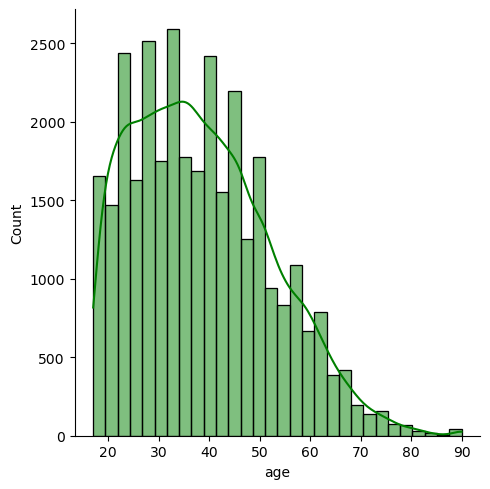

In [114]:
sns.displot(df['age'].dropna(), kde=True, bins=30, color='Green')

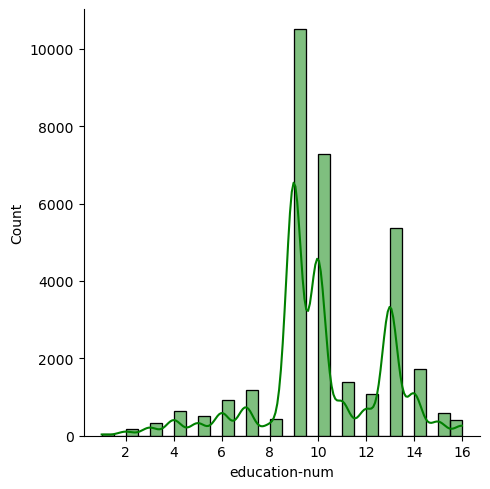

In [116]:
sns.displot(df['education-num'].dropna(), kde=True, bins=30, color='Green')

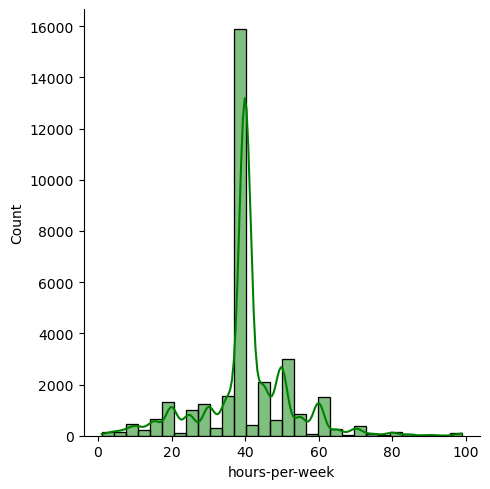

In [118]:
sns.displot(df['hours-per-week'].dropna(), kde=True, bins=30, color='Green')